<a href="https://colab.research.google.com/github/mumtazharis/PCVK_MumtazHaris/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

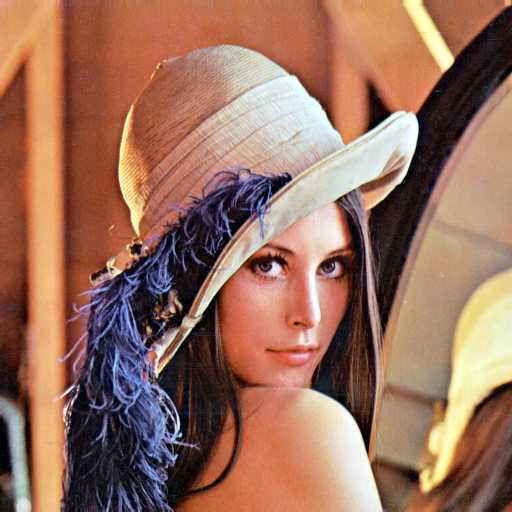

In [132]:
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
cv2_imshow(image)

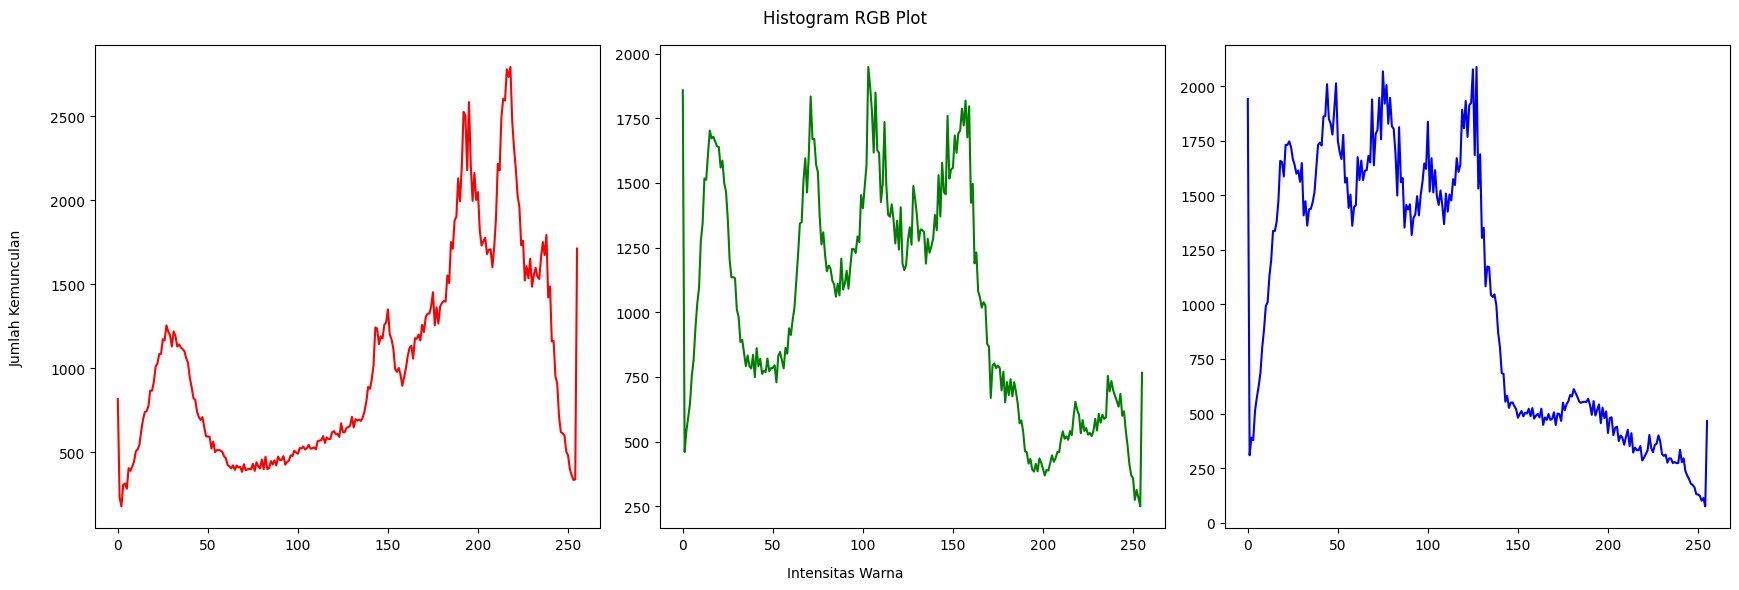

In [133]:
# Mendapatkan dimensi gambar
height, width, _ = image.shape

# Inisialisasi histogram untuk masing-masing channel (256 nilai intensitas)
hist_red = np.zeros(256, dtype=int)
hist_green = np.zeros(256, dtype=int)
hist_blue = np.zeros(256, dtype=int)

# Looping melalui setiap piksel dalam gambar
for i in range(height):
    for j in range(width):
        # Mendapatkan nilai intensitas untuk setiap channel pada posisi (i, j)
        blue_value = image[i, j, 0]
        green_value = image[i, j, 1]
        red_value = image[i, j, 2]

        # Tingkatkan nilai pada indeks yang sesuai dengan intensitas pixel
        hist_blue[blue_value] += 1
        hist_green[green_value] += 1
        hist_red[red_value] += 1

# Membuat subplot 1 baris, 3 kolom
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot histogram merah
axs[0].plot(hist_red, color='red')

# Plot histogram hijau
axs[1].plot(hist_green, color='green')

# Plot histogram biru
axs[2].plot(hist_blue, color='blue')

# Menambahkan satu label sumbu X dan Y untuk semua plot
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center', va='center')  # Label sumbu X
fig.text(0.04, 0.5, 'Jumlah Kemunculan', ha='center', va='center', rotation='vertical')  # Label sumbu Y
fig.suptitle('Histogram RGB Plot')
# Tampilkan semua plot
plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Sesuaikan layout agar label tidak terpotong
plt.show()

In [134]:
red_channel = image[:, :, 2]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 0]

hist_red, bin_edges_red = np.histogram(red_channel, bins=256, range=(0, 256))
hist_green, bin_edges_green = np.histogram(green_channel, bins=256, range=(0, 256))
hist_blue, bin_edges_blue = np.histogram(blue_channel, bins=256, range=(0, 256))

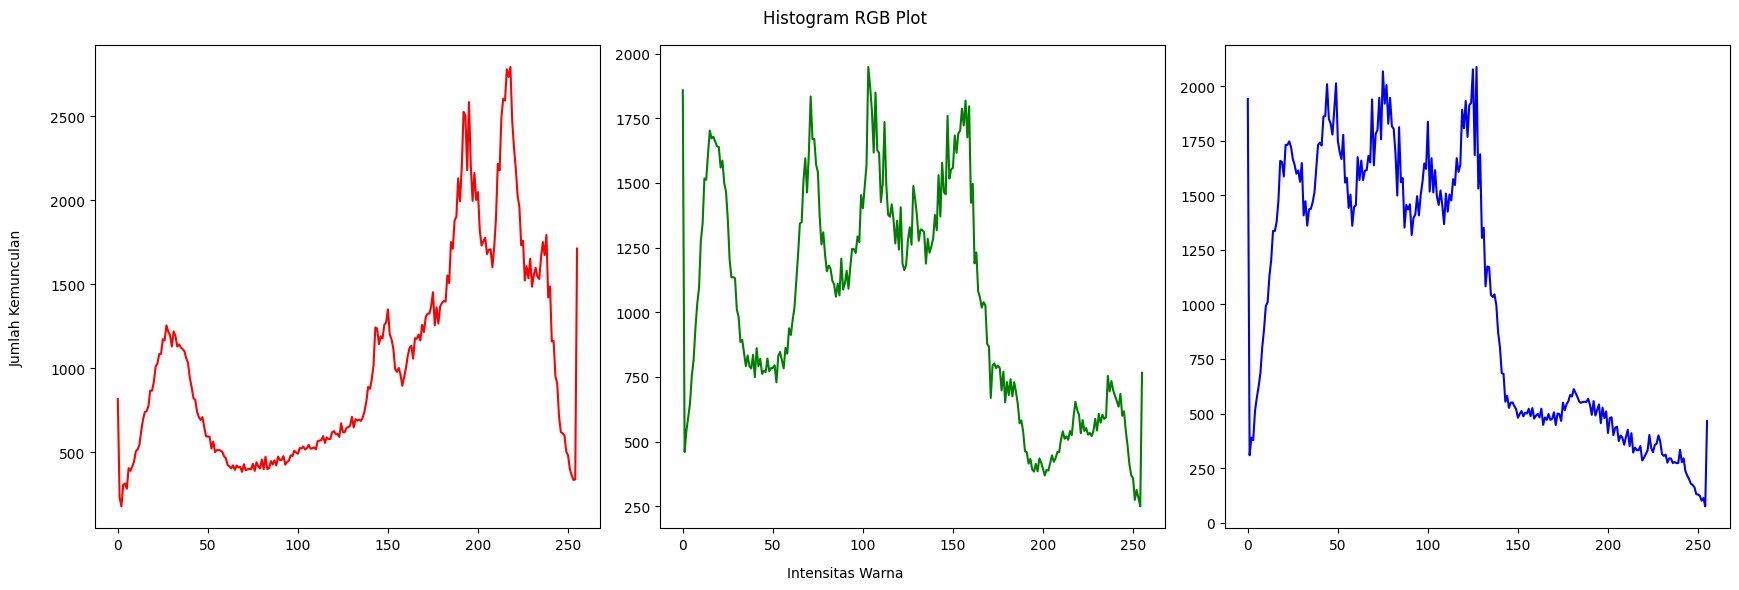

In [135]:
# Membuat subplot 1 baris, 3 kolom
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot histogram merah
axs[0].plot(hist_red, color='red')

# Plot histogram hijau
axs[1].plot(hist_green, color='green')

# Plot histogram biru
axs[2].plot(hist_blue, color='blue')

# Menambahkan satu label sumbu X dan Y untuk semua plot
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center', va='center')  # Label sumbu X
fig.text(0.04, 0.5, 'Jumlah Kemunculan', ha='center', va='center', rotation='vertical')  # Label sumbu Y
fig.suptitle('Histogram RGB Plot')
# Tampilkan semua plot
plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Sesuaikan layout agar label tidak terpotong
plt.show()

# Equalized image manual

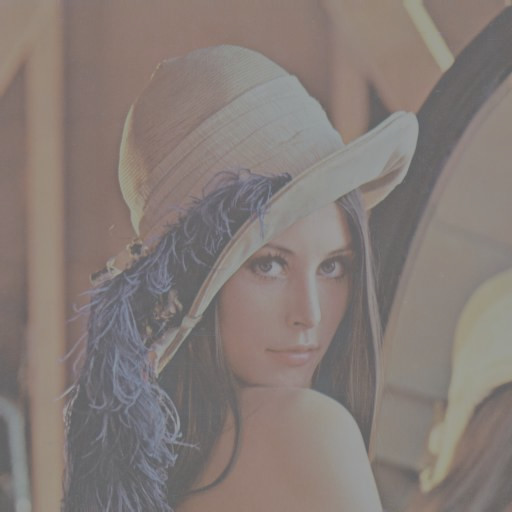

In [136]:
image2 = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
cv2_imshow(image2)

In [137]:
red_channel2 = image2[:, :, 2]
green_channel2 = image2[:, :, 1]
blue_channel2 = image2[:, :, 0]

hist_red2, bin_edges_red = np.histogram(red_channel2, bins=256, range=(0, 256))
hist_green2, bin_edges_green = np.histogram(green_channel2, bins=256, range=(0, 256))
hist_blue2, bin_edges_blue = np.histogram(blue_channel2, bins=256, range=(0, 256))

In [138]:
proba_red = hist_red2 / np.sum(hist_red2)
proba_green = hist_green2 / np.sum(hist_green2)
proba_blue = hist_blue2 / np.sum(hist_blue2)

new_red = np.zeros(256)
new_green = np.zeros(256)
new_blue = np.zeros(256)
for i in range(256):
  new_red[i] = round((256-1)*np.sum(proba_red[:i+1]))
  new_green[i] = round((256-1)*np.sum(proba_green[:i+1]))
  new_blue[i] = round((256-1)*np.sum(proba_blue[:i+1]))

# Map CDF values ke pixel intensitas asli
equalized_red_channel = new_red[red_channel2]
equalized_green_channel = new_green[green_channel2]
equalized_blue_channel = new_blue[blue_channel2]

# Gabungkan channel hasil equalization
equalized_image = np.stack([equalized_blue_channel, equalized_green_channel, equalized_red_channel], axis=-1)
# Pastikan gambar dalam format uint8
equalized_image = equalized_image.astype(np.uint8)

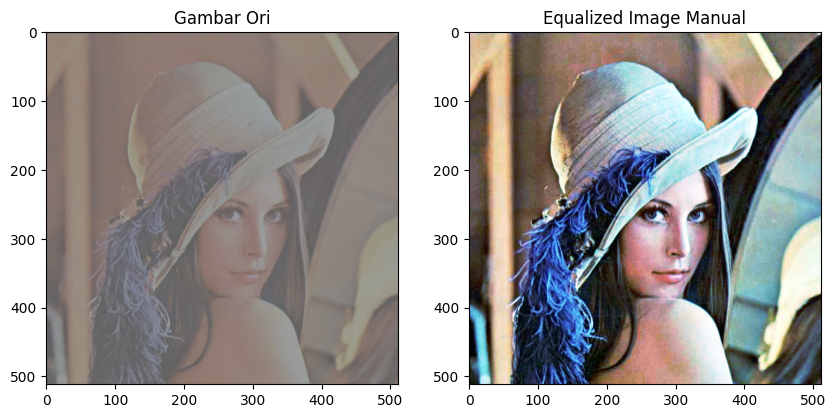

In [139]:
# Visualisasi hasil
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Gambar Ori')

# Gambar setelah histogram equalization
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image Manual')

plt.show()

In [140]:
hist_equalized_red, bin_edges_red = np.histogram(equalized_red_channel, bins=256, range=(0, 256))
hist_equalized_green, bin_edges_green = np.histogram(equalized_green_channel, bins=256, range=(0, 256))
hist_equalized_blue, bin_edges_blue = np.histogram(equalized_blue_channel, bins=256, range=(0, 256))

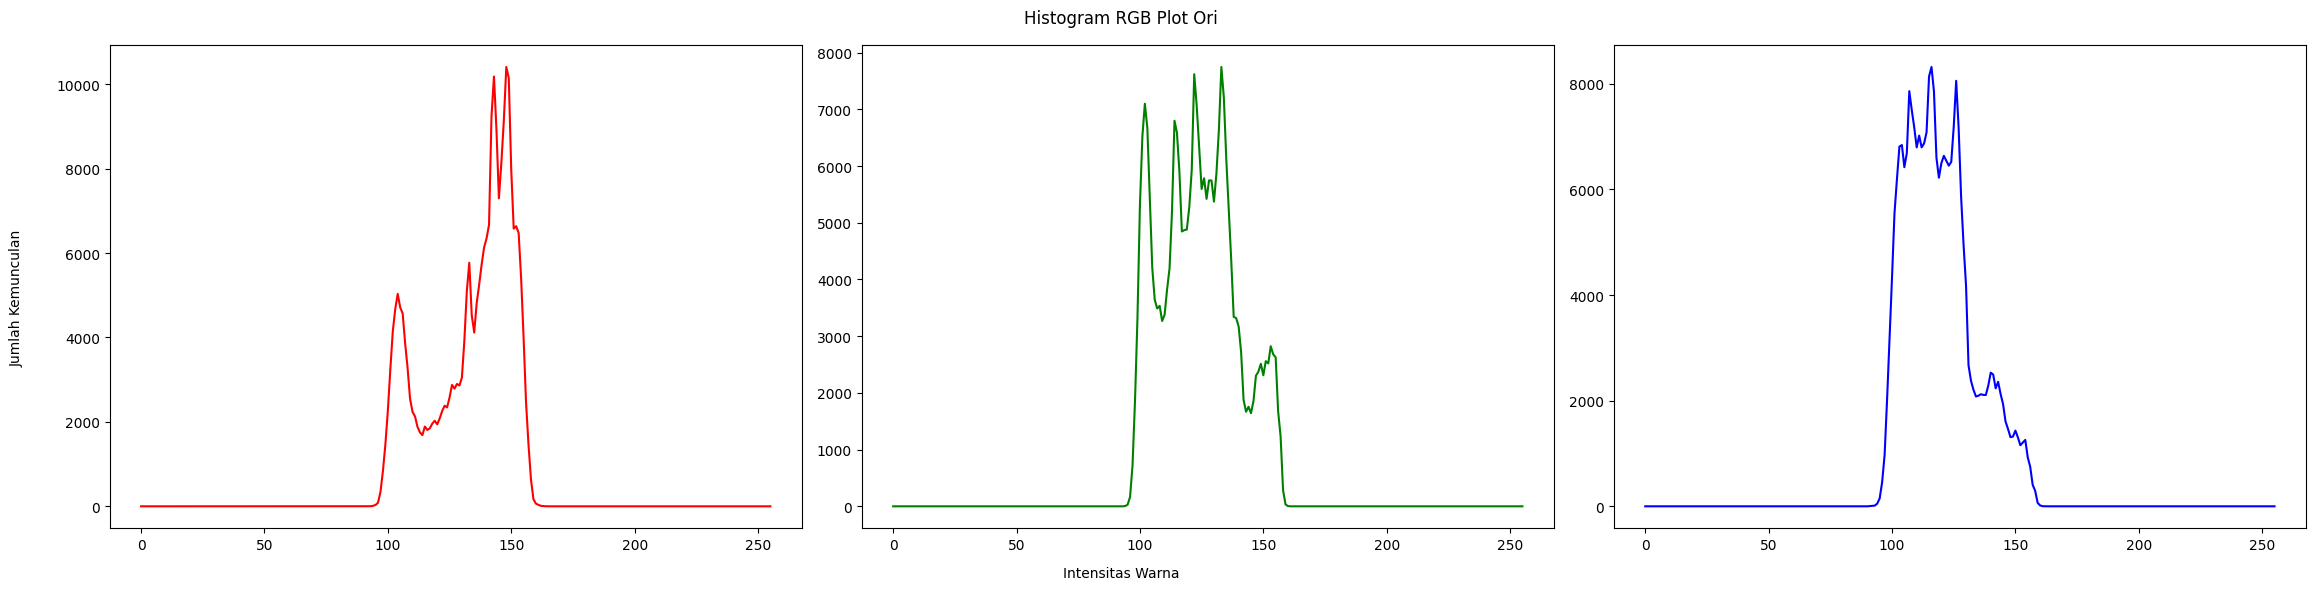

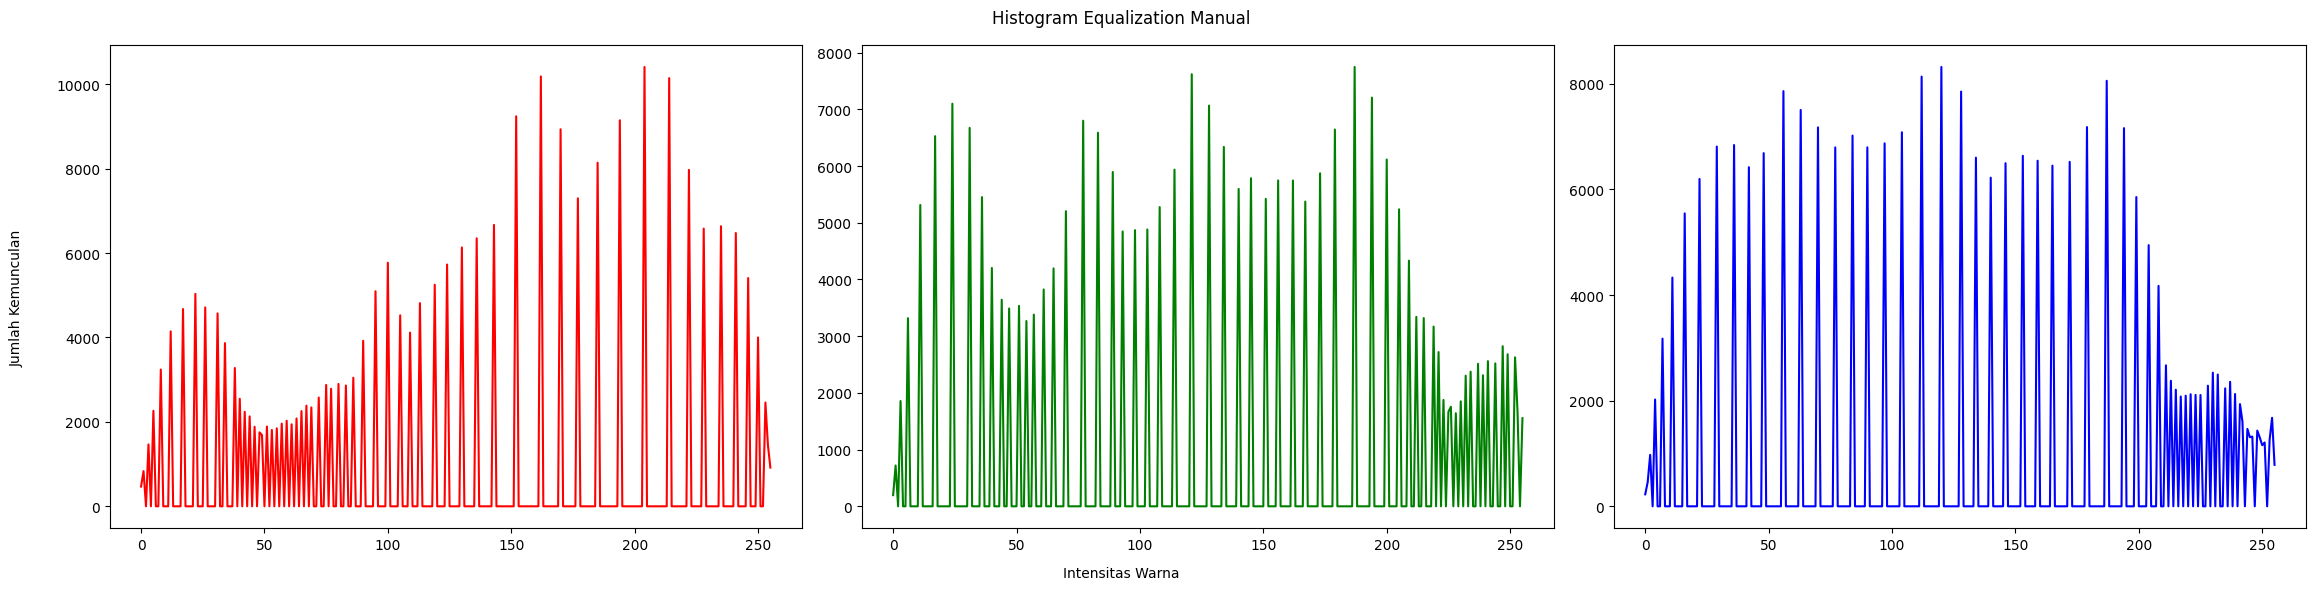

In [141]:
# Membuat subplot 1 baris, 3 kolom
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plot histogram merah
axs[0].plot(hist_red2, color='red')

# Plot histogram hijau
axs[1].plot(hist_green2, color='green')

# Plot histogram biru
axs[2].plot(hist_blue2, color='blue')

# Menambahkan satu label sumbu X dan Y untuk semua plot
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center', va='center')  # Label sumbu X
fig.text(0.04, 0.5, 'Jumlah Kemunculan', ha='center', va='center', rotation='vertical')  # Label sumbu Y
fig.suptitle('Histogram RGB Plot Ori')
# Tampilkan semua plot
plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Sesuaikan layout agar label tidak terpotong
plt.show()

# Membuat subplot 1 baris, 3 kolom
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plot histogram merah
axs[0].plot(hist_equalized_red, color='red')

# Plot histogram hijau
axs[1].plot(hist_equalized_green, color='green')

# Plot histogram biru
axs[2].plot(hist_equalized_blue, color='blue')

# Menambahkan satu label sumbu X dan Y untuk semua plot
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center', va='center')  # Label sumbu X
fig.text(0.04, 0.5, 'Jumlah Kemunculan', ha='center', va='center', rotation='vertical')  # Label sumbu Y
fig.suptitle('Histogram Equalization Manual')
# Tampilkan semua plot
plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Sesuaikan layout agar label tidak terpotong
plt.show()

# Equalized image dengan equalizeHist

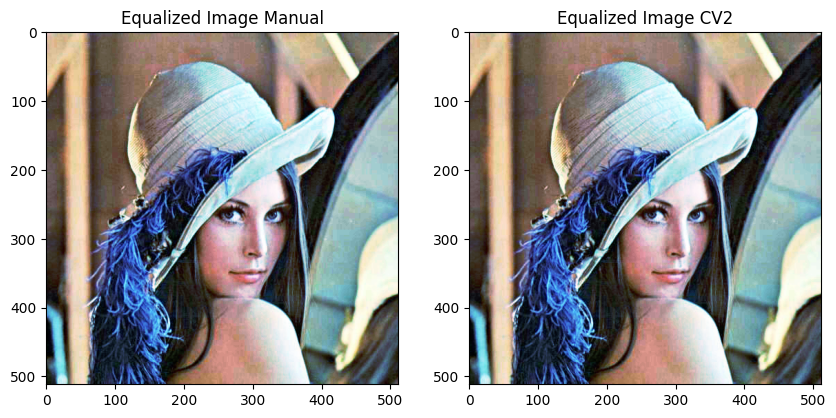

In [142]:
# Lakukan histogram equalization pada setiap channel
equalized_red_channel_cv2 = cv2.equalizeHist(red_channel2)
equalized_green_channel_cv2 = cv2.equalizeHist(green_channel2)
equalized_blue_channel_cv2 = cv2.equalizeHist(blue_channel2)

equalized_image_cv2 = cv2.merge([equalized_blue_channel_cv2, equalized_green_channel_cv2, equalized_red_channel_cv2])


# Visualisasi hasil
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image Manual')

# Gambar setelah histogram equalization
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_image_cv2, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image CV2')

plt.show()

In [143]:
hist_equalized_red_cv2, bin_edges_red = np.histogram(equalized_red_channel_cv2, bins=256, range=(0, 256))
hist_equalized_green_cv2, bin_edges_green = np.histogram(equalized_green_channel_cv2, bins=256, range=(0, 256))
hist_equalized_blue_cv2, bin_edges_blue = np.histogram(equalized_blue_channel_cv2, bins=256, range=(0, 256))

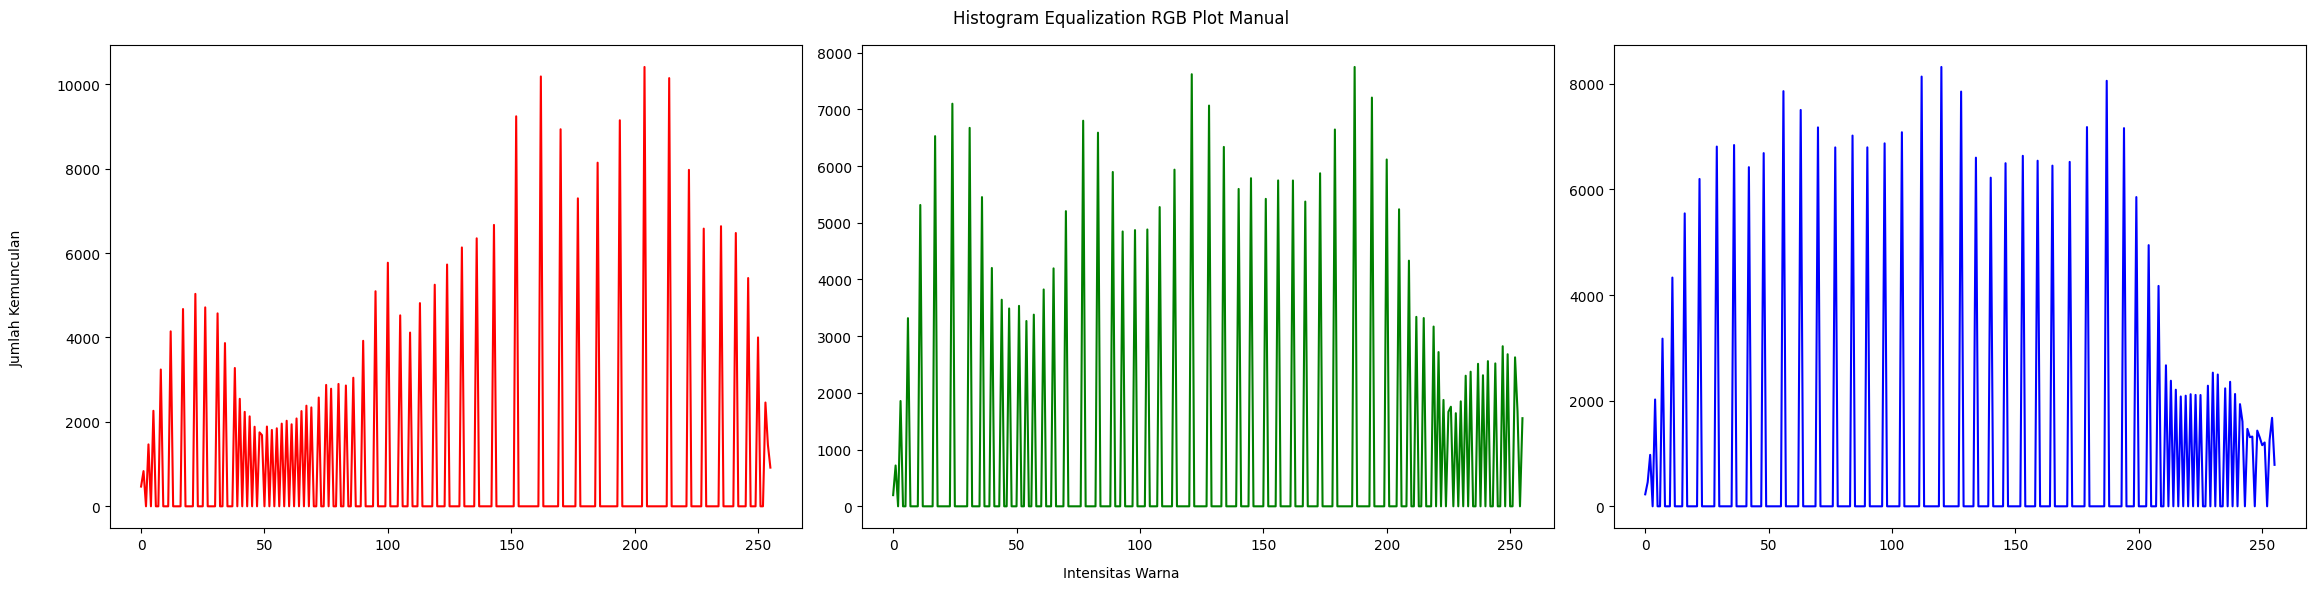

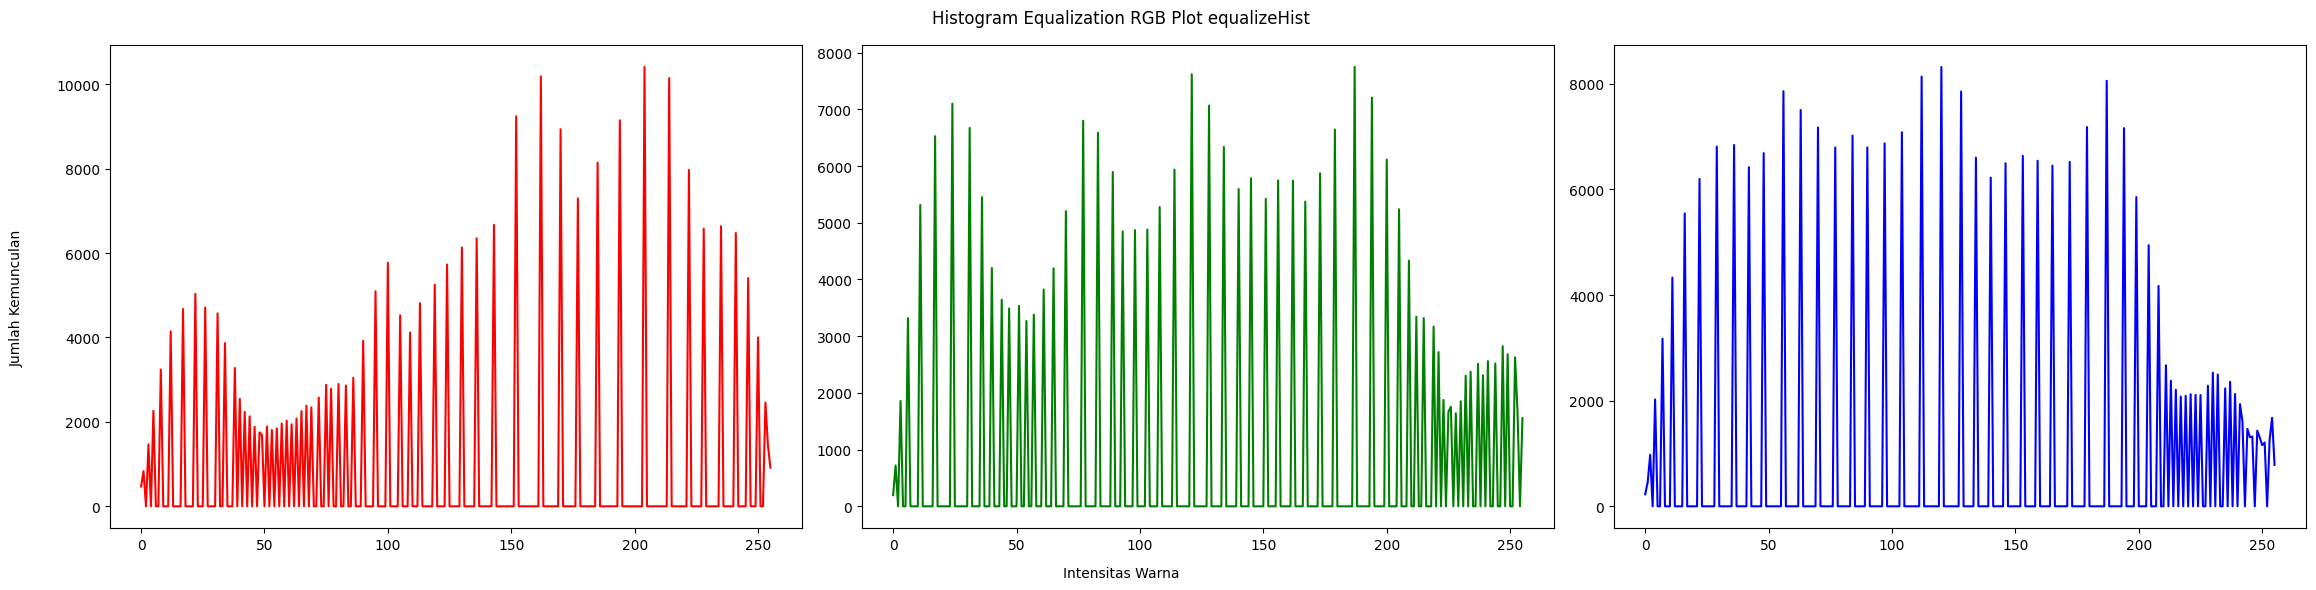

In [144]:
# Membuat subplot 1 baris, 3 kolom
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plot histogram merah
axs[0].plot(hist_equalized_red, color='red')

# Plot histogram hijau
axs[1].plot(hist_equalized_green, color='green')

# Plot histogram biru
axs[2].plot(hist_equalized_blue, color='blue')

# Menambahkan satu label sumbu X dan Y untuk semua plot
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center', va='center')  # Label sumbu X
fig.text(0.04, 0.5, 'Jumlah Kemunculan', ha='center', va='center', rotation='vertical')  # Label sumbu Y
fig.suptitle('Histogram Equalization RGB Plot Manual')
# Tampilkan semua plot
plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Sesuaikan layout agar label tidak terpotong
plt.show()

# Membuat subplot 1 baris, 3 kolom
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plot histogram merah
axs[0].plot(hist_equalized_red_cv2, color='red')

# Plot histogram hijau
axs[1].plot(hist_equalized_green_cv2, color='green')

# Plot histogram biru
axs[2].plot(hist_equalized_blue_cv2, color='blue')

# Menambahkan satu label sumbu X dan Y untuk semua plot
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center', va='center')  # Label sumbu X
fig.text(0.04, 0.5, 'Jumlah Kemunculan', ha='center', va='center', rotation='vertical')  # Label sumbu Y
fig.suptitle('Histogram Equalization RGB Plot equalizeHist')
# Tampilkan semua plot
plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Sesuaikan layout agar label tidak terpotong
plt.show()

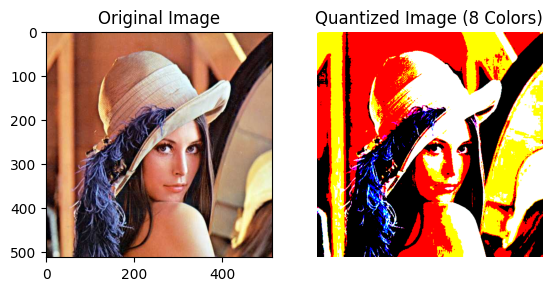

In [145]:
# Definisikan warna target dalam format RGB
colors = {
    "merah": [255, 0, 0],
    "hitam": [0, 0, 0],
    "hijau": [0, 255, 0],
    "kuning": [255, 255, 0],
    "biru": [0, 0, 255],
    "cyan": [0, 255, 255],
    "magenta": [255, 0, 255],
    "putih": [255, 255, 255]
}

# Convert colors dictionary to array for easier calculations
color_array = np.array(list(colors.values()))

def map_to_8_colors(image):
    # Siapkan gambar hasil
    height, width, _ = image.shape
    quantized_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Pemetaan warna
    for i in range(height):
        for j in range(width):
            pixel = image[i, j]
            # Hitung jarak ke setiap warna target
            distances = np.linalg.norm(color_array - pixel, axis=1)
            # Temukan indeks warna terdekat
            nearest_color_index = np.argmin(distances)
            # Peta warna terdekat
            quantized_image[i, j] = color_array[nearest_color_index]

    return quantized_image

# Contoh penggunaan
# Membaca gambar
original_image = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')  # Ganti dengan path gambar Anda
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Mengonversi dari BGR ke RGB

# Melakukan pemetaan warna
quantized_image = map_to_8_colors(original_image)

# Menampilkan gambar asli dan gambar terkuantisasi
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(quantized_image)
plt.title('Quantized Image (8 Colors)')
plt.axis('off')

plt.show()

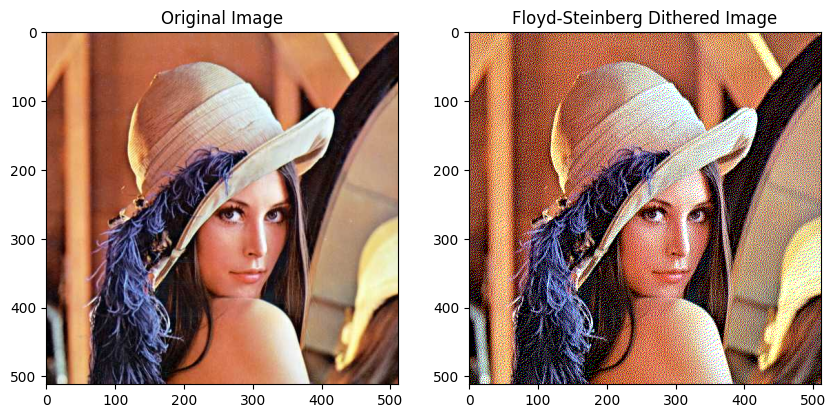

In [146]:
# Floyd-Steinberg dithering pada gambar RGB dengan operasi dalam float
def floyd_steinberg_dithering_rgb(image):
    # Pisahkan channel warna (BGR format dari OpenCV)
    blue_channel = image[:, :, 0].astype(float).copy()
    green_channel = image[:, :, 1].astype(float).copy()
    red_channel = image[:, :, 2].astype(float).copy()

    height, width = blue_channel.shape

    # Fungsi untuk melakukan dithering pada channel tunggal
    def apply_dithering(channel):
        for i in range(height):
            for j in range(width):
                old_pixel = channel[i, j]
                new_pixel = 255 if old_pixel > 128 else 0  # Ambang batas 128 untuk memetakan ke hitam/putih
                channel[i, j] = new_pixel
                error = old_pixel - new_pixel

                # Sebarkan kesalahan ke piksel tetangga
                if j + 1 < width:
                    channel[i, j + 1] += error * 7 / 16
                if i + 1 < height:
                    if j - 1 >= 0:
                        channel[i + 1, j - 1] += error * 3 / 16
                    channel[i + 1, j] += error * 5 / 16
                    if j + 1 < width:
                        channel[i + 1, j + 1] += error * 1 / 16
        return channel

    # Terapkan dithering pada setiap channel
    blue_dithered = np.clip(apply_dithering(blue_channel), 0, 255)
    green_dithered = np.clip(apply_dithering(green_channel), 0, 255)
    red_dithered = np.clip(apply_dithering(red_channel), 0, 255)

    # Gabungkan kembali channel yang telah di-dither
    dithered_image = cv2.merge([blue_dithered.astype(np.uint8), green_dithered.astype(np.uint8), red_dithered.astype(np.uint8)])

    return dithered_image

# Membaca gambar
original_image = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')  # Ganti dengan path gambar Anda
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Mengonversi dari BGR ke RGB

# Melakukan dithering Floyd-Steinberg
dithered_image = floyd_steinberg_dithering_rgb(original_image)

plt.figure(figsize=(10, 5))
# Menampilkan gambar asli dan gambar hasil dithering
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(dithered_image)
plt.title('Floyd-Steinberg Dithered Image')

plt.show()

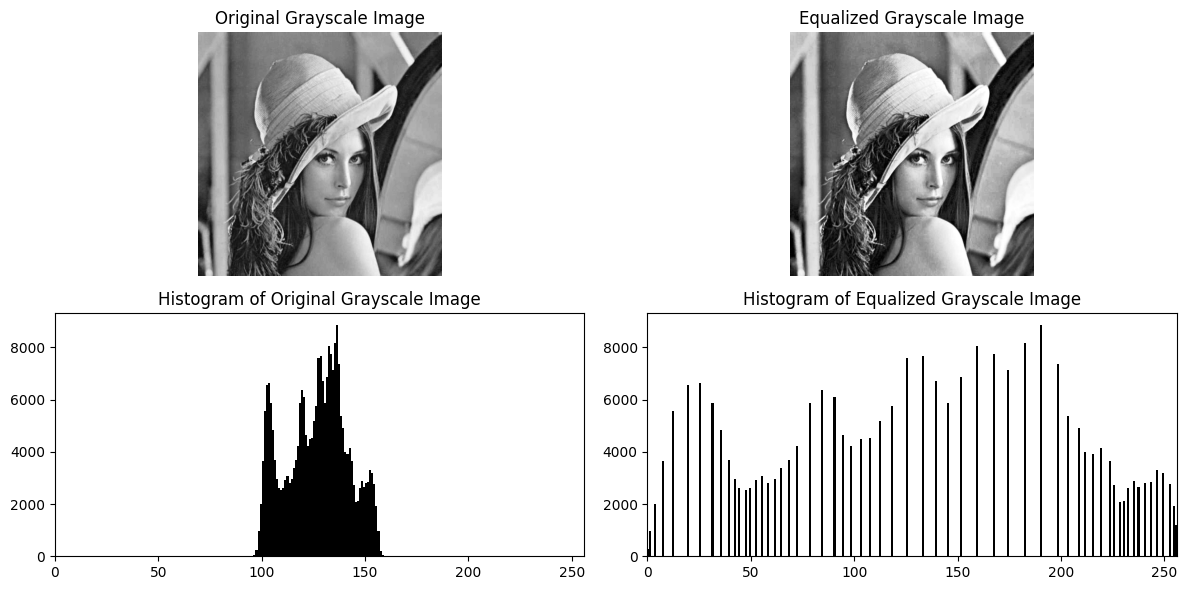

In [147]:
image_soal9 = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Mengonversi gambar ke grayscale
grayscale_image = cv2.cvtColor(image_soal9, cv2.COLOR_BGR2GRAY)

# Melakukan histogram equalization pada gambar grayscale
equalized_image = cv2.equalizeHist(grayscale_image)

# Menampilkan gambar asli dan hasil equalization
plt.figure(figsize=(12, 6))

# Menampilkan gambar asli
plt.subplot(2, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Menampilkan gambar yang telah equalization
plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Grayscale Image')
plt.axis('off')

# Menampilkan histogram untuk gambar grayscale asli
plt.subplot(2, 2, 3)
plt.hist(grayscale_image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Original Grayscale Image')
plt.xlim([0, 256])

# Menampilkan histogram untuk gambar equalized
plt.subplot(2, 2, 4)
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Equalized Grayscale Image')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

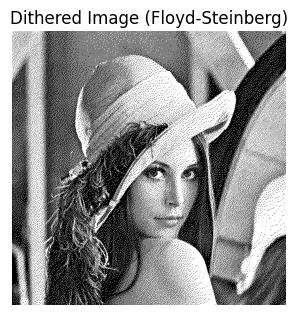

In [148]:
# Fungsi Floyd-Steinberg dithering
def floyd_steinberg_dithering(image):
    height, width = image.shape
    dithered_image = np.copy(image).astype(float)  # Bekerja dengan float untuk menghitung kesalahan

    for y in range(height):
        for x in range(width):
            old_pixel = dithered_image[y, x]
            new_pixel = 255 if old_pixel > 128 else 0  # Ambang batas 128 untuk dithering
            dithered_image[y, x] = new_pixel
            error = old_pixel - new_pixel

            # Menyebarkan kesalahan ke tetangga sesuai algoritma Floyd-Steinberg
            if x + 1 < width:
                dithered_image[y, x + 1] += error * 7 / 16
            if y + 1 < height:
                if x - 1 >= 0:
                    dithered_image[y + 1, x - 1] += error * 3 / 16
                dithered_image[y + 1, x] += error * 5 / 16
                if x + 1 < width:
                    dithered_image[y + 1, x + 1] += error * 1 / 16

    return np.clip(dithered_image, 0, 255).astype(np.uint8)  # Membatasi nilai piksel antara 0 dan 255

# Terapkan Floyd-Steinberg dithering pada gambar equalized
dithered_image = floyd_steinberg_dithering(equalized_image)

# Menampilkan gambar asli, hasil equalization, dan hasil dithering
plt.figure(figsize=(12, 6))

# Gambar hasil dithering Floyd-Steinberg
plt.subplot(1, 3, 3)
plt.imshow(dithered_image, cmap='gray')
plt.title('Dithered Image (Floyd-Steinberg)')
plt.axis('off')

plt.show()